## SETUP AND IMPORT

In [1]:
import boto3
from sagemaker import get_execution_role

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import io

# Initialize an S3 client using boto3
s3 = boto3.client('s3')

#Get the role
role = get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [2]:
try:
    from wordcloud import WordCloud, STOPWORDS
except:
    print("[INFO] Couldn't find wordcloud... installing it.")
    !pip install -q wordcloud
    from wordcloud import WordCloud, STOPWORDS

In [3]:
#Define the bucket with the qqp csv
source_bucket = "bucket-data-qqp-2024"

In [4]:
#Check bucket content
for key in s3.list_objects(Bucket=source_bucket)['Contents']:
    print(key['Key'])

QQP_2024/01-2024_01.csv
QQP_2024/01-2024_02.csv
QQP_2024/02-2024_01.csv
QQP_2024/02-2024_02.csv
QQP_2024/03-2024_01.csv
QQP_2024/03-2024_02.csv
QQP_2024/04-2024_01.csv
QQP_2024/04-2024_02.csv
QQP_2024/05-2024_01.csv
QQP_2024/05-2024_02.csv


## READ CSV FROM S3

In [5]:
#Define prefix of s3
prefix = "QQP_2024"

In [6]:
#Setup a function to retrieve csv from csv using boto3
def get_csv_from_s3(source_bucket, prefix, filename, colum_name:None):
    
    #Path to the file in the bucket
    source_file = '{}/{}'.format(prefix, filename)
    
    # Retrieve the CSV file from the source S3 bucket
    obj = s3.get_object(Bucket=source_bucket, Key=source_file)

    # Read the CSV file into a pandas DataFrame
    return pd.read_csv(io.BytesIO(obj['Body'].read()), names=column_name, header=None)

In [7]:
#Define a list for column names
column_name = ["PRODUCTO","PRESENTACION","MARCA","CATEGORIA","CATALOGO","PRECIO","FECHA_REGISTRO","CADENA_COMERCIAL",
               "GIRO","NOMBRE_COMERCIAL","DIRECCION", "ESTADO","MUNICIPIO","LATITUD","LONGITUD"]

In [8]:
#Load january 
df_01_2024_P1 = get_csv_from_s3(source_bucket,prefix,'01-2024_01.csv',column_name)
df_01_2024_P2 = get_csv_from_s3(source_bucket,prefix,'01-2024_02.csv',column_name)

In [9]:
#Load february
df_02_2024_P1 = get_csv_from_s3(source_bucket,prefix,'02-2024_01.csv',column_name)
df_02_2024_P2 = get_csv_from_s3(source_bucket,prefix,'02-2024_02.csv',column_name)

In [10]:
#Load march
df_03_2024_P1 = get_csv_from_s3(source_bucket,prefix,'03-2024_01.csv',column_name)
df_03_2024_P2 = get_csv_from_s3(source_bucket,prefix,'03-2024_02.csv',column_name)

In [11]:
#Load april
df_04_2024_P1 = get_csv_from_s3(source_bucket,prefix,'04-2024_01.csv',column_name)
df_04_2024_P2 = get_csv_from_s3(source_bucket,prefix,'04-2024_02.csv',column_name)

In [12]:
#Load may
df_05_2024_P1 = get_csv_from_s3(source_bucket,prefix,'05-2024_01.csv',column_name)
df_05_2024_P2 = get_csv_from_s3(source_bucket,prefix,'05-2024_02.csv',column_name)

In [13]:
#Check out data
df_01_2024_P1.head()

,PRODUCTO,PRESENTACION,MARCA,CATEGORIA,CATALOGO,PRECIO,FECHA_REGISTRO,CADENA_COMERCIAL,GIRO,NOMBRE_COMERCIAL,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
0,ASPIRADORAS,HV-120 KG3 A. POTENCIA 400 WATTS,KOBLENZ. ASPIRADORA MANUAL DE ALTO PODER,APARATOS ELECTRICOS,ELECTRODOMESTICOS,899.0,2024-01-02,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL ESPACIO AGUASCALIENTES,"TECNOLOGICO 120, INT. CENTRO COMERCIAL ESPACIO...",AGUASCALIENTES,AGUASCALIENTES,21.87949,-102.260011
1,BARRA DE SONIDO,"S40 Q. BLUETOOTH, USB. POTENCIA 300 W. SONIDO 2.1",LG,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,4299.0,2024-01-02,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL ESPACIO AGUASCALIENTES,"TECNOLOGICO 120, INT. CENTRO COMERCIAL ESPACIO...",AGUASCALIENTES,AGUASCALIENTES,21.87949,-102.260011
2,BARRA DE SONIDO,"HT-S20R. BLUETOOTH, USB. POTENCIA 400 W. SONID...",SONY,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,4499.0,2024-01-02,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL ESPACIO AGUASCALIENTES,"TECNOLOGICO 120, INT. CENTRO COMERCIAL ESPACIO...",AGUASCALIENTES,AGUASCALIENTES,21.87949,-102.260011
3,BARRA DE SONIDO,S-400 O HT-S400. BLUETOOTH. USB. POTENCIA 330 ...,SONY,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,4899.0,2024-01-02,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL ESPACIO AGUASCALIENTES,"TECNOLOGICO 120, INT. CENTRO COMERCIAL ESPACIO...",AGUASCALIENTES,AGUASCALIENTES,21.87949,-102.260011
4,BATIDORAS,FPSTHM3532 O FPSTHM3532-013. MANUAL. 6 VELOCID...,OSTER,APARATOS ELECTRICOS,ELECTRODOMESTICOS,669.0,2024-01-02,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL ESPACIO AGUASCALIENTES,"TECNOLOGICO 120, INT. CENTRO COMERCIAL ESPACIO...",AGUASCALIENTES,AGUASCALIENTES,21.87949,-102.260011


## CREATE A DATAFRAME FOR 2024 DATA AND CHECK IT

In [14]:
#Define a dataframe for 2024 records
df_qqp_2024 = pd.concat([df_01_2024_P1, df_01_2024_P2, df_02_2024_P1, df_02_2024_P2, df_03_2024_P1,
                        df_03_2024_P2, df_04_2024_P1, df_04_2024_P2, df_05_2024_P1, df_05_2024_P2])


In [15]:
#Columns data type is
df_qqp_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5867689 entries, 0 to 354405
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PRODUCTO          object 
 1   PRESENTACION      object 
 2   MARCA             object 
 3   CATEGORIA         object 
 4   CATALOGO          object 
 5   PRECIO            float64
 6   FECHA_REGISTRO    object 
 7   CADENA_COMERCIAL  object 
 8   GIRO              object 
 9   NOMBRE_COMERCIAL  object 
 10  DIRECCION         object 
 11  ESTADO            object 
 12  MUNICIPIO         object 
 13  LATITUD           float64
 14  LONGITUD          float64
dtypes: float64(3), object(12)
memory usage: 716.3+ MB


In [16]:
#Transform to datetime
df_qqp_2024['FECHA_REGISTRO'] = pd.to_datetime(df_qqp_2024['FECHA_REGISTRO'])

In [17]:
#Columns data type now is
df_qqp_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5867689 entries, 0 to 354405
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PRODUCTO          object        
 1   PRESENTACION      object        
 2   MARCA             object        
 3   CATEGORIA         object        
 4   CATALOGO          object        
 5   PRECIO            float64       
 6   FECHA_REGISTRO    datetime64[ns]
 7   CADENA_COMERCIAL  object        
 8   GIRO              object        
 9   NOMBRE_COMERCIAL  object        
 10  DIRECCION         object        
 11  ESTADO            object        
 12  MUNICIPIO         object        
 13  LATITUD           float64       
 14  LONGITUD          float64       
dtypes: datetime64[ns](1), float64(3), object(11)
memory usage: 716.3+ MB


In [18]:
#Check for nulls
df_qqp_2024.isna().sum()

PRODUCTO               0
PRESENTACION           0
MARCA                  0
CATEGORIA              0
CATALOGO               0
PRECIO                 0
FECHA_REGISTRO         1
CADENA_COMERCIAL       1
GIRO                   1
NOMBRE_COMERCIAL       1
DIRECCION              1
ESTADO                 1
MUNICIPIO              1
LATITUD             4332
LONGITUD            4332
dtype: int64

## ¿CUÁNTOS REGISTROS HAY HASTA AHORA EN 2024?

In [19]:
#Check number of row and columns
print(f"En lo que va de 2024 la cantidad de registros sobre productos que se han hecho es {df_qqp_2024.shape[0]}")

En lo que va de 2024 la cantidad de registros sobre productos que se han hecho es 5867689


## ¿CUÁNTAS CATEGORIAS HAY?

In [20]:
print(f"La cantidad de categorias es monitoriadas en 2024 es {len(df_qqp_2024.CATEGORIA.unique())}")

La cantidad de categorias es monitoriadas en 2024 es 42


## ¿CUÁNTAS CADENAS COMERCIALES HAY?

In [21]:
print(f"La cantidad de cadenas comerciales monitoreadas en 2024 es {len(df_qqp_2024.CADENA_COMERCIAL.unique())}")

La cantidad de cadenas comerciales monitoreadas en 2024 es 214


## ¿CUAL ES LA CATEGORIA MAS MONITOREADA PARA CADA ESTADO?

In [22]:
#Group by "ESTADO" and "CATEGORIA" and count
df_grouped_by_state = df_qqp_2024.groupby(['ESTADO','CATEGORIA']).size().reset_index(name='count')

In [23]:
#Get the the category with the most entries per state
max_category_per_state = df_grouped_by_state.loc[df_grouped_by_state.groupby('ESTADO')['count'].idxmax()]

#Check 
max_category_per_state

,ESTADO,CATEGORIA,count
32,AGUASCALIENTES,MEDICAMENTOS,29119
74,BAJA CALIFORNIA,MEDICAMENTOS,32931
116,BAJA CALIFORNIA SUR,MEDICAMENTOS,25988
157,CAMPECHE,MEDICAMENTOS,30269
196,CHIAPAS,MEDICAMENTOS,13826
238,CHIHUAHUA,MEDICAMENTOS,34194
280,CIUDAD DE MÉXICO,MEDICAMENTOS,256474
322,COAHUILA DE ZARAGOZA,MEDICAMENTOS,31266
364,DURANGO,MEDICAMENTOS,28101
406,ESTADO DE MÉXICO,MEDICAMENTOS,162099


## ¿CUAL ES LA CADENA COMERCIAL CON MÁS PRODUCTOS MONITOREADOS?

In [24]:
#Extract the top 10 companies with more products register in the database
top_10_comercial_chain = df_qqp_2024["CADENA_COMERCIAL"].value_counts().head(10)
top_10_comercial_chain

CADENA_COMERCIAL
WAL-MART                920516
HIPERMERCADO SORIANA    644258
BODEGA AURRERA          630006
MEGA SORIANA            497145
CHEDRAUI                417032
WAL-MART EXPRESS        374527
FARMACIA GUADALAJARA    177326
SORIANA                 161640
LA COMER                146788
MERCADO SORIANA         146628
Name: count, dtype: int64

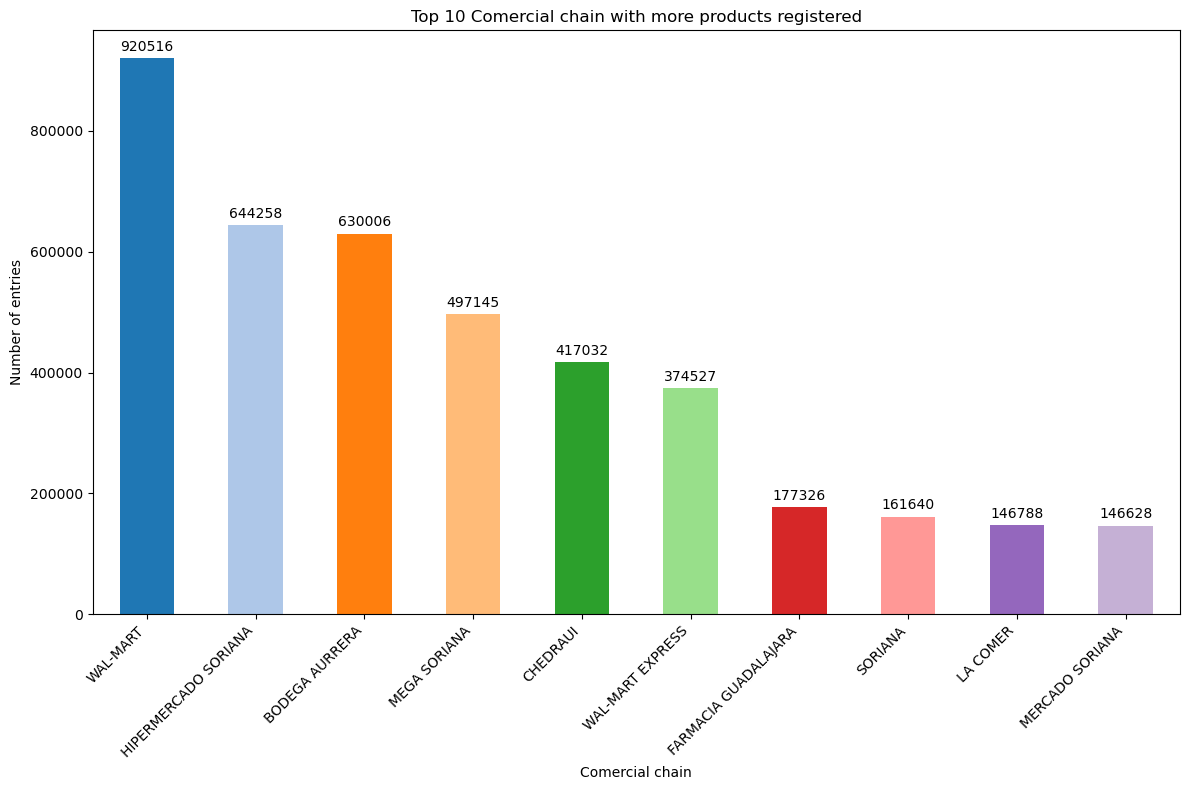

In [25]:
#Config palet and apply color
colors = sns.color_palette('tab20', n_colors=10)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = top_10_comercial_chain.plot(kind='bar', color=colors)

#Define bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Config label and title
plt.xlabel('Comercial chain')
plt.ylabel('Number of entries')
plt.title('Top 10 Comercial chain with more products registered')
plt.xticks(rotation=45, ha='right')

# Plot
plt.tight_layout()
plt.show()

## ¿CUALES SON LOS CATALOGOS CON MÁS PRODUCTOS?

In [26]:
#Extract the top 10 categories with more products register in the database
top_10_catalog = df_qqp_2024["CATALOGO"].value_counts().head(10)
top_10_catalog

CATALOGO
BASICOS                3223819
MEDICAMENTOS           1311793
ELECTRODOMESTICOS       434008
FRUTAS Y LEGUMBRES      341607
PACIC                   258781
MERCADOS                124303
UTILES ESCOLARES         93104
PESCADOS Y MARISCOS      60958
JUGUETES                 19114
NAVIDEÑOS                  202
Name: count, dtype: int64

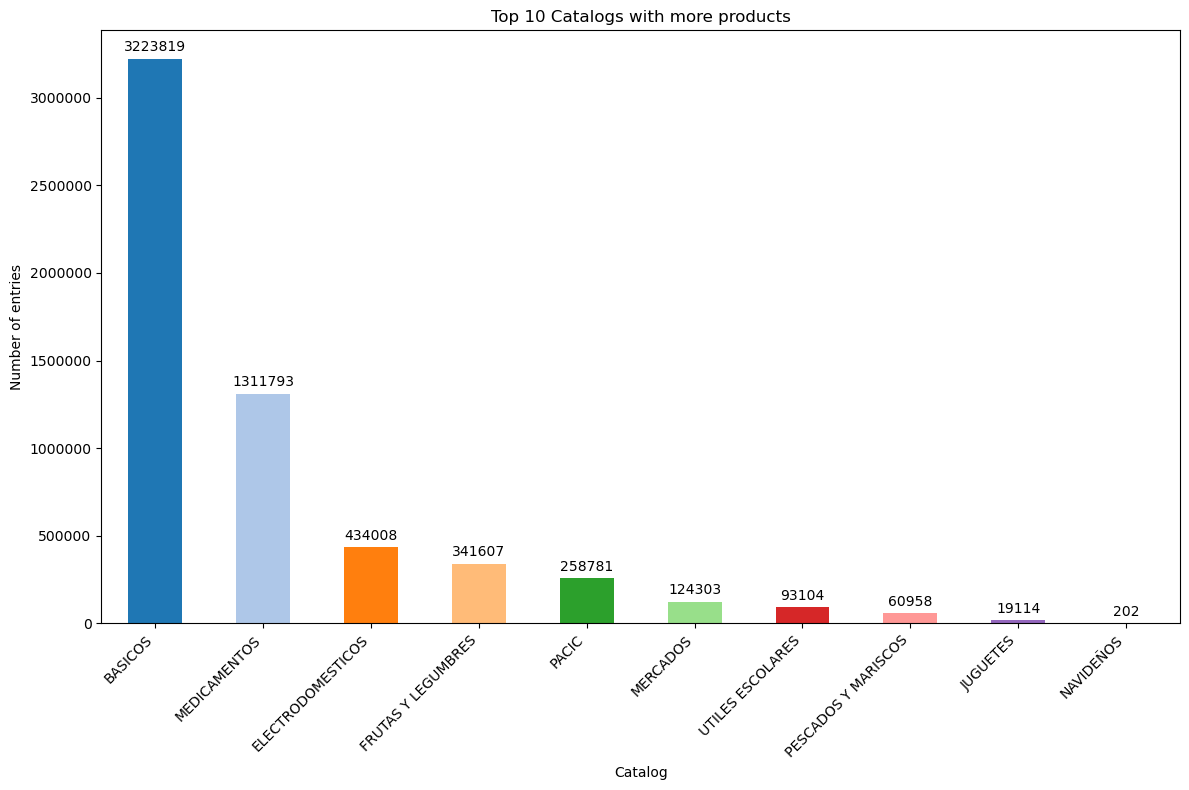

In [27]:
# Config palet and apply color
colors = sns.color_palette('tab20', n_colors=10)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = top_10_catalog.plot(kind='bar', color=colors)

# Define bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Config label and title
plt.xlabel('Catalog')
plt.ylabel('Number of entries')
plt.title('Top 10 Catalogs with more products')
plt.xticks(rotation=45, ha='right')

# Set y-axis to integer format
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='y')

# Plot
plt.tight_layout()
plt.show()

## CANTIDAD DE REGISTROS MES A MES

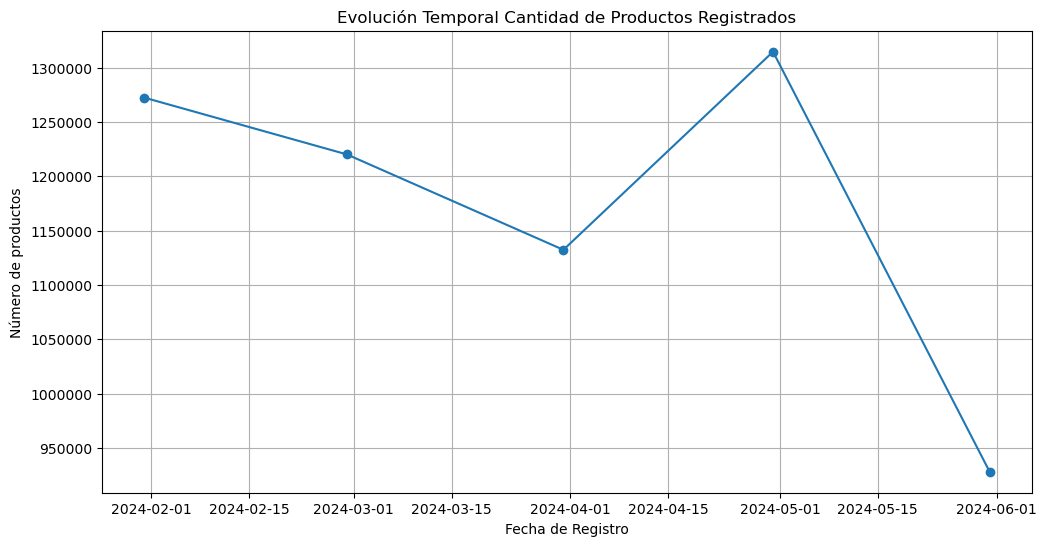

In [28]:
time_series = df_qqp_2024.set_index('FECHA_REGISTRO').resample('ME').size()

plt.figure(figsize=(12, 6))
plt.plot(time_series, marker='o', linestyle='-')
plt.xlabel('Fecha de Registro')
plt.ylabel('Número de productos')
plt.title('Evolución Temporal Cantidad de Productos Registrados')
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='y')
plt.grid(True)
plt.show()

## LINEA DE TIEMPO PRECIO PRODUCTOS

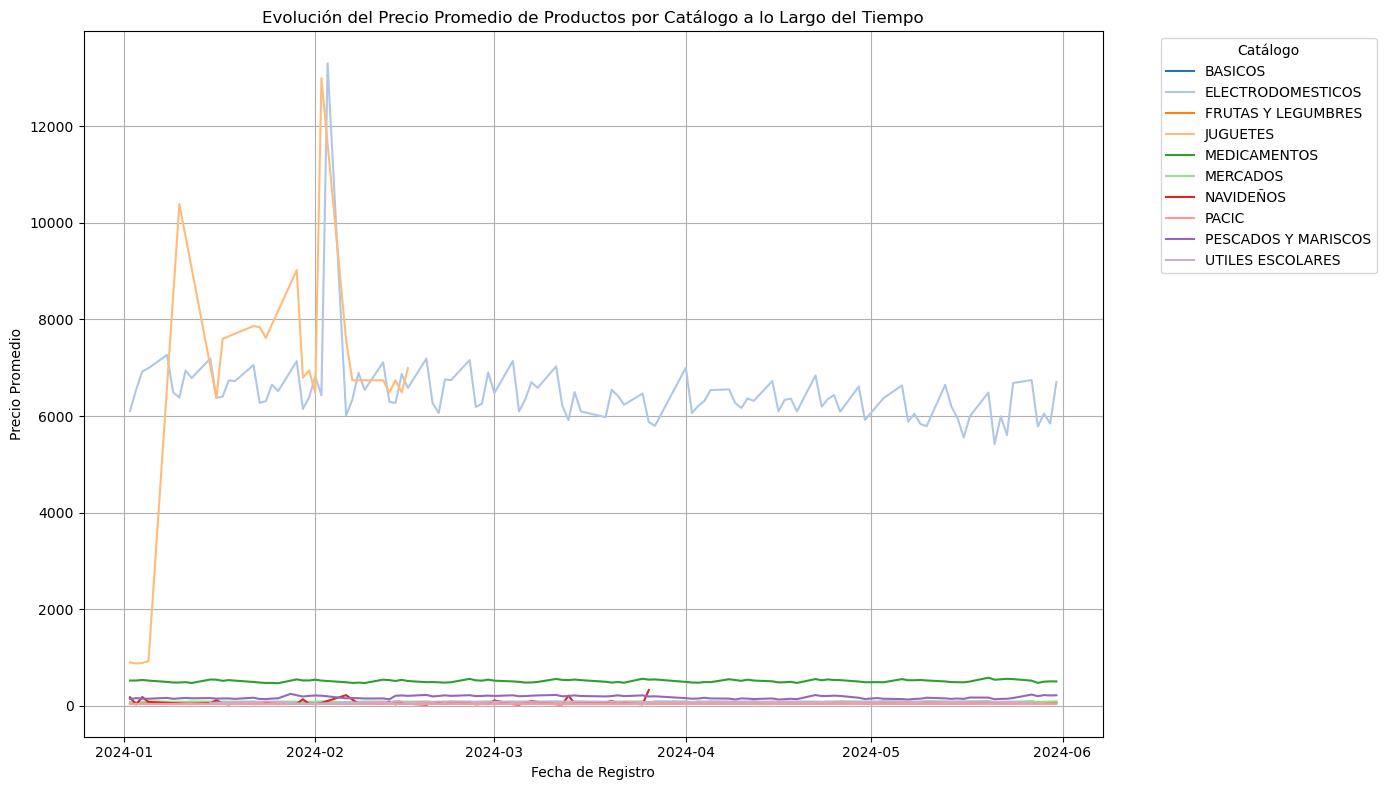

In [45]:
# Group by FECHA_REGISTRO y CATALOGO, and calculate mean price
daily_avg_price = df_qqp_2024.groupby(['FECHA_REGISTRO', 'CATALOGO'])['PRECIO'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_avg_price, x='FECHA_REGISTRO', y='PRECIO', hue='CATALOGO', palette='tab20')
plt.xlabel('Fecha de Registro')
plt.ylabel('Precio Promedio')
plt.title('Evolución del Precio Promedio de Productos por Catálogo a lo Largo del Tiempo')
plt.legend(title='Catálogo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## EVOLUCIÓN COSTOS BÁSICO GRANDES CADENAS

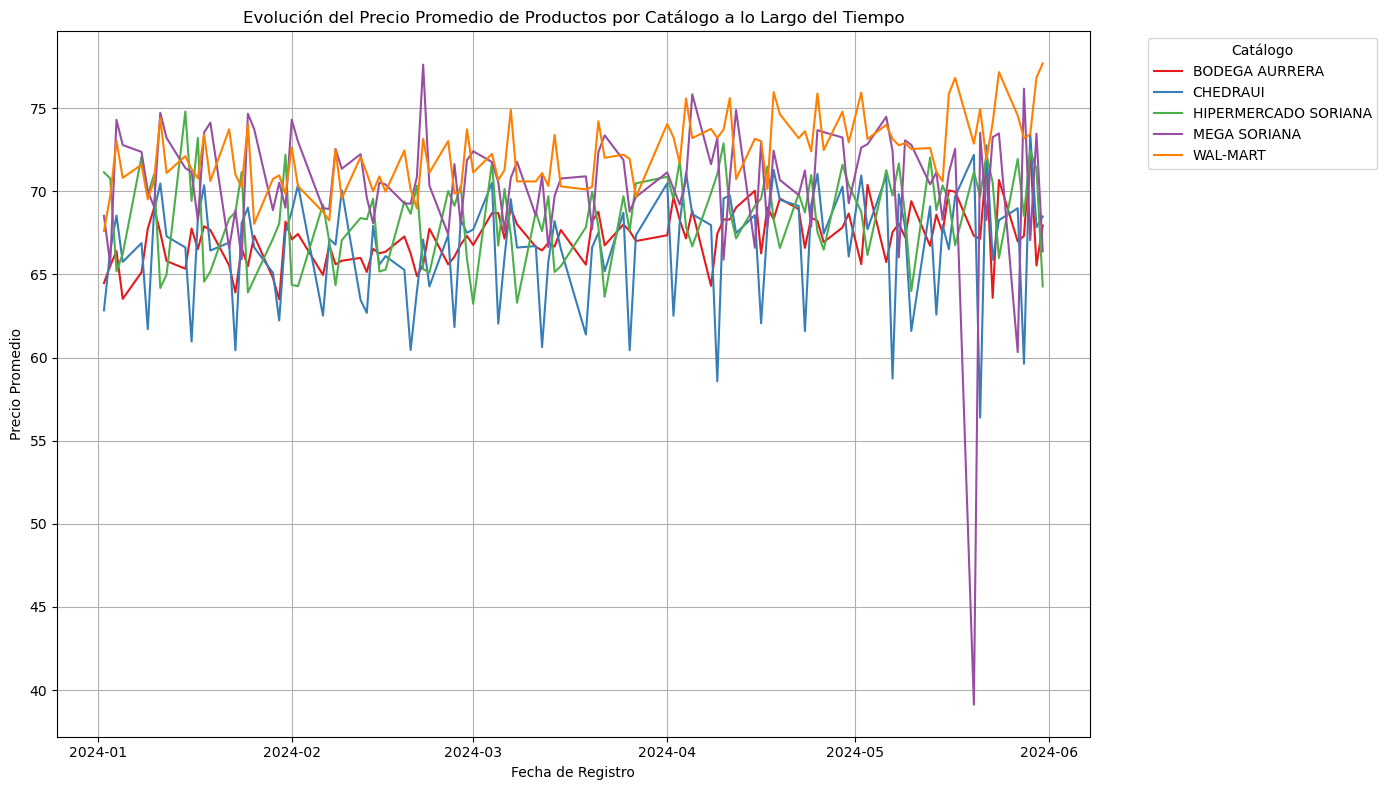

In [66]:
top_5_comercial_chain = df_qqp_2024["CADENA_COMERCIAL"].value_counts().head(5)

#Group by FECHA_REGISTRO y CADENA_COMERCIAL
df_grouped_top_chain = df_qqp_2024.groupby(['FECHA_REGISTRO', 'CADENA_COMERCIAL','CATALOGO'])['PRECIO'].mean().reset_index()
#Filter top comercial chains and C
df_grouped_top_chain = df_grouped_top_chain[(df_grouped_top_chain.CADENA_COMERCIAL.isin(top_5_comercial_chain.index))  & (df_grouped_top_chain.CATALOGO =="BASICOS")]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped_top_chain, x='FECHA_REGISTRO', y='PRECIO', hue='CADENA_COMERCIAL', palette='Set1')
plt.xlabel('Fecha de Registro')
plt.ylabel('Precio Promedio')
plt.title('Evolución del Precio Promedio de Productos por Catálogo a lo Largo del Tiempo')
plt.legend(title='Catálogo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## WORD CLOUD PRESENTACIÓN

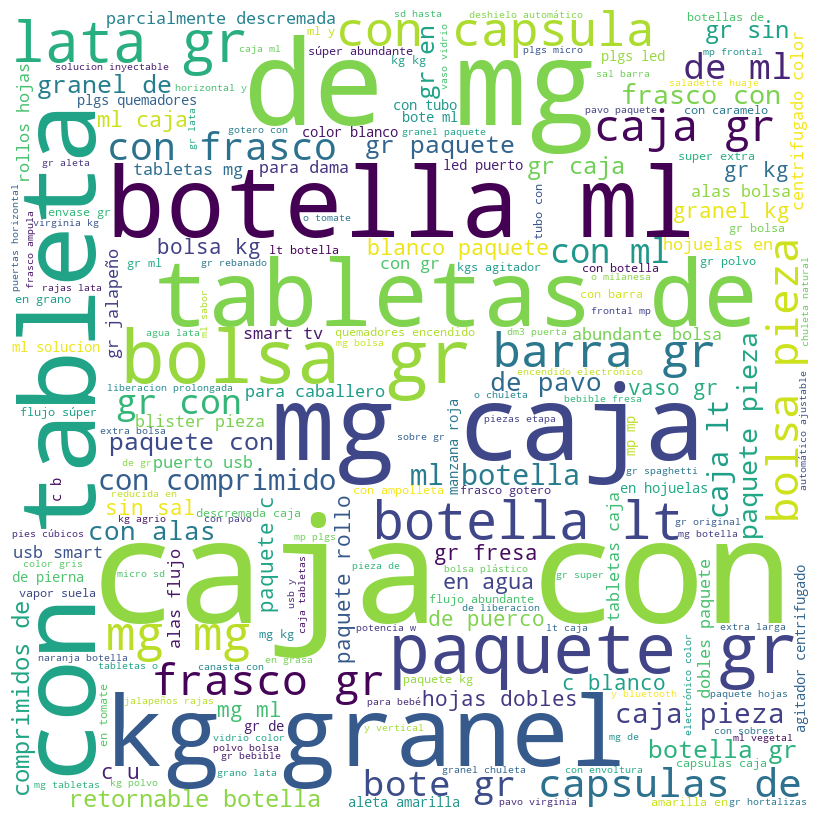

In [29]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_qqp_2024["PRESENTACION"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()